In [200]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error

In [201]:
df = pd.read_csv("/Users/jeremyhudsonchan/Dropbox/Files/Boston_College_Courses/Thesis/Data/Processed/Years/officer_profile_train.csv")
test_df = pd.read_csv("/Users/jeremyhudsonchan/Dropbox/Files/Boston_College_Courses/Thesis/Data/Processed/Years/officer_profile_test.csv")

In [202]:
# Drop the columns that are not useful
df = df.drop(columns=['OfficerFirst', 'OfficerLast', 'Unit', 'Rank', 'Star'])
test_df = test_df.drop(columns=['OfficerFirst', 'OfficerLast', 'Unit', 'Rank', 'Star'])

In [203]:
# swap Beat column and num_allegations column position
cols = list(df.columns.values)
cols[-1], cols[-2] = cols[-2], cols[-1]
df = df[cols]
cols = list(test_df.columns.values)
cols[-1], cols[-2] = cols[-2], cols[-1]
test_df = test_df[cols]

In [204]:
print(df.head())
print(test_df.head())

   OfficerID Gender           Race  ApptDate  Age    Beat  num_allegations  \
0          1      M          White   38621.0   51  2012.0               33   
1          2      F       Hispanic   38621.0   42   713.0               33   
2          7      M          White   35037.0   50   434.0               32   
3         13      M          White   30284.0   69  2431.0               30   
4         16      M  Asian/Pacific   39566.0   38   433.0               30   

   BeatCount  
0       37.0  
1      344.0  
2      166.0  
3       25.0  
4      130.0  
   OfficerID Gender      Race  ApptDate  Age  Beat  num_allegations  BeatCount
0         34      M     Black   35975.0   49   NaN               10        NaN
1         54      M  Hispanic   34736.0   60   NaN                9        NaN
2         60      M  Hispanic   37466.0   44   NaN                9        NaN
3         65      M  Hispanic   35555.0   50   NaN                9        NaN
4        107      M     White   41876.0   32  

In [205]:
# Drop row if there is a NaN
df = df.dropna()
test_df = test_df.dropna()

In [206]:
df['Beat'] = df['Beat'].astype(float).astype(int)
test_df['Beat'] = test_df['Beat'].astype(float).astype(int)

In [207]:
df['ApptDate'] = df['ApptDate'].astype(float).astype(int)
test_df['ApptDate'] = test_df['ApptDate'].astype(float).astype(int)

In [208]:
# run CatBoostRegressor on the data
model = CatBoostRegressor(iterations=2, depth=2, learning_rate=1, loss_function='RMSE', cat_features=['Gender', 'Race', 'ApptDate', 'Beat'])

In [209]:
X_train = df.drop(columns=["num_allegations"])
Y_train = df["num_allegations"]

X_test = test_df.drop(columns=["num_allegations"])
Y_test = test_df["num_allegations"]

[1]


In [189]:
# fit the model
model.fit(X_train, Y_train)

0:	learn: 3.0082753	total: 3.13ms	remaining: 3.13ms
1:	learn: 2.9438146	total: 4.49ms	remaining: 0us


In [190]:
# Get predicted results on the train data and compare to actual results
Y_pred_train = model.predict(X_train)
print(Y_pred_train)

# get mean squared error
mse_train = mean_absolute_error(Y_train, Y_pred_train)
print(mse_train)

[9.63559599 9.63559599 9.63559599 ... 2.48163827 0.32392904 2.48163827]
2.19837085474176


In [191]:
# Get predicted results on the test data and compare to actual results
Y_pred_test = model.predict(X_test)
print(Y_pred_test)

# get mean squared error
mse_test = mean_absolute_error(Y_test, Y_pred_test)
print(mse_test)

[2.48163827 2.48163827 2.48163827 2.48163827 2.48163827 2.48163827
 2.48163827 2.48163827 2.48163827 2.48163827 2.48163827 2.48163827
 2.48163827 2.48163827 2.48163827 2.48163827 2.48163827 2.48163827
 2.48163827 2.48163827 2.48163827 2.48163827 2.48163827 2.48163827
 2.48163827 2.48163827 2.48163827 2.48163827 2.48163827 2.48163827
 2.48163827 0.32392904 2.48163827 2.48163827 2.48163827 2.48163827
 2.48163827 2.48163827 2.48163827 2.48163827 2.48163827 2.48163827
 2.48163827 2.48163827 2.48163827 2.48163827 2.48163827 2.48163827
 2.48163827 2.48163827 2.48163827 2.48163827 2.48163827 2.48163827
 2.48163827 2.48163827 0.32392904 2.48163827 2.48163827 2.48163827
 2.48163827 2.48163827 2.48163827 2.48163827 2.48163827 2.48163827
 2.48163827 2.48163827 2.48163827 2.48163827 2.48163827 2.48163827
 2.48163827 2.48163827 2.48163827 2.48163827 0.32392904 2.48163827
 2.48163827 2.48163827 2.48163827 2.48163827 0.32392904 2.48163827
 2.48163827 2.48163827 2.48163827 2.48163827 2.48163827 0.3239

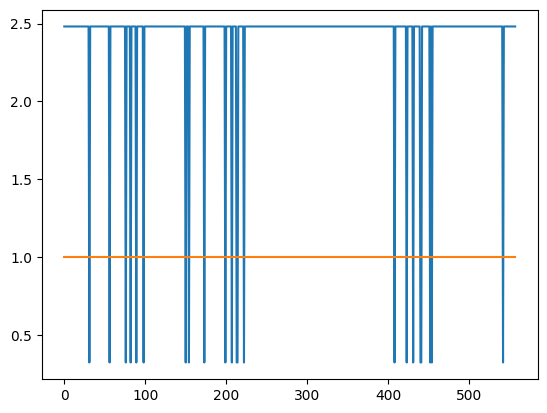

In [198]:
# Plot the results, np.arange(0, len(Y_pred_test)) is the x-axis
plt.plot(np.arange(0, len(Y_pred_test)), Y_pred_test, label="Predicted")
plt.plot(np.arange(0, len(Y_pred_test)), Y_test, label="Actual")
plt.show()

In [199]:
print(Y_test)

2706    1
2707    1
2708    1
2709    1
2710    1
       ..
4400    1
4401    1
4402    1
4403    1
4404    1
Name: num_allegations, Length: 558, dtype: int64


In [29]:
# Combine two dataframe concat
preprocess_df = pd.concat([df, test_df], axis=0)

In [30]:
print(preprocess_df.columns)

Index(['OfficerID', 'OfficerFirst', 'OfficerLast', 'Gender', 'Race',
       'ApptDate', 'Unit', 'Rank', 'Star', 'Age', 'BeatCount',
       'num_allegations', 'Beat'],
      dtype='object')


In [32]:
print(preprocess_df.isnull())
# get index of rows with null values
null_data = preprocess_df[preprocess_df.isnull().any(axis=1)]
print(null_data)
# drop rows with null values
preprocess_df = preprocess_df.dropna()
print(preprocess_df)

      OfficerID  Gender   Race  ApptDate   Rank    Age  BeatCount  \
0         False   False  False     False  False  False       True   
1         False   False  False     False  False  False       True   
2         False   False  False     False  False  False       True   
3         False   False  False     False  False  False       True   
4         False   False  False     False  False  False       True   
...         ...     ...    ...       ...    ...    ...        ...   
4404      False   False  False     False   True  False       True   
4405      False   False  False      True   True  False       True   
4406      False   False  False      True   True  False       True   
4407      False   False  False      True   True  False       True   
4408      False   False  False      True   True  False       True   

      num_allegations   Beat  
0               False  False  
1               False  False  
2               False  False  
3               False  False  
4               

In [17]:
# Use one hot encoding on the columns: Gender, Race, Rank
enc = OneHotEncoder(handle_unknown='ignore')
temp_df = data[["Gender", "Race", "Rank"]]
enc_df = pd.DataFrame(enc.fit_transform(temp_df).toarray())
# drop index column
enc_df = enc_df.drop(columns=[0])
print(enc_df)

     1    2    3    4    5    6    7    8    9    10   11   12   13
0   0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
1   1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
2   1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
3   1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
4   1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
5   0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
6   1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
7   1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
8   1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
9   1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
10  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
11  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
12  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
13  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0 

In [18]:
# join with the original dataframe, index column is the common column
data = data.join(enc_df, how='left')
data = data.drop(columns=["Gender", "Race", "Rank"])
print(data)

      OfficerID  ApptDate  Age  BeatCount    Beat    1    2    3    4    5  \
17          114   33112.0   62       32.0   933.0  1.0  0.0  0.0  0.0  1.0   
19          124   32868.0   61       50.0  1133.0  1.0  0.0  0.0  1.0  0.0   
75          533   37529.0   43       73.0   934.0  NaN  NaN  NaN  NaN  NaN   
81          632   31579.0   61      121.0  1533.0  NaN  NaN  NaN  NaN  NaN   
109         823   37592.0   46      259.0  1213.0  NaN  NaN  NaN  NaN  NaN   
121         932   39069.0   40      109.0   422.0  NaN  NaN  NaN  NaN  NaN   
135        1013   36227.0   52       54.0  1622.0  NaN  NaN  NaN  NaN  NaN   
136        1014   38593.0   41      132.0   621.0  NaN  NaN  NaN  NaN  NaN   
139        1022   31845.0   71      106.0  2211.0  NaN  NaN  NaN  NaN  NaN   
160        1222   35142.0   51       61.0  1031.0  NaN  NaN  NaN  NaN  NaN   
161        1224   37011.0   55       87.0  1913.0  NaN  NaN  NaN  NaN  NaN   
164        1231   38593.0   40       51.0   832.0  NaN  NaN  NaN

In [19]:
# frequency encoding on the column Beat
beat_freq = data["Beat"].value_counts()
data["Beat"] = data["Beat"].map(beat_freq)

officerid = data["OfficerID"].value_counts()
data["OfficerID"] = data["OfficerID"].map(officerid)

# divide ApptDate column by 1000
data["ApptDate"] = data["ApptDate"] / 1000

# combine data and target
data = data.join(target, how='left')
# drop rows with null values
data = data.dropna()
# separate data and target
target = data["num_allegations"]
data = data.drop(columns=["num_allegations"])


In [21]:
lr = LinearRegression()

# Import Test CSV
test_df = pd.read_csv("/Users/jeremyhudsonchan/Dropbox/Files/Boston_College_Courses/Thesis/Data/Processed/Years/officer_profile_test.csv")

In [23]:
test_df.columns

Index(['OfficerID', 'OfficerFirst', 'OfficerLast', 'Gender', 'Race',
       'ApptDate', 'Unit', 'Rank', 'Star', 'Age', 'BeatCount',
       'num_allegations'],
      dtype='object')

In [24]:
test_target = test_df["num_allegations"]
test_data = test_df.drop(columns=["num_allegations"])

In [ ]:
print(df.isnull())
# get index of rows with null values
null_data = df[df.isnull().any(axis=1)]
print(null_data)
# drop rows with null values
df = df.dropna()
print(df)

In [25]:
lr.fit(data, target)

/Users/jeremyhudsonchan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LinearRegression()

In [26]:
print("In-Sample Error: ", lr.score(data, target))
print("Out-Sample Error: ", lr.score(test_data, test_target))
# get mean squrared error
print(np.mean((lr.predict(test_data) - test_target)**2))

/Users/jeremyhudsonchan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/jeremyhudsonchan/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In-Sample Error:  1.0


ValueError: could not convert string to float: 'Floyd'